In [1]:
# eda08_00 clear all variables and import vatious modules
%reset -f
import os
from datetime import date
from math import exp, pi, sin, cos, sqrt, floor, ceil, atan2
import numpy as np
import scipy.sparse.linalg as las
from scipy import sparse
import scipy.linalg as la
import scipy.signal as sg
from matplotlib import pyplot as plt
from matplotlib import patches as pch
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

# eda_draw function makes a "pictorial matrix equation"
# arguments are vectors, matrices and strings
# which are plotted in the order that the appear
# except that strings starting with 'title ' are plotted
# under the subseqeunt matrix or vector
# always returns a status of 1

def eda_draw(*argv):
    bw = np.zeros((256,4));
    v = 0.9*(256 - np.linspace( 0, 255, 256 ))/255;
    bw[:,0] = v;
    bw[:,1] = v;
    bw[:,2] = v;
    bw[:,3] = np.ones(256);
    bwcmap = ListedColormap(bw);
    # size of plot
    W = 16;
    H = 4;
    fig1 = plt.figure(1);
    # figsize width and height in inches
    fig1.set_size_inches(W,H);
    ax1 = plt.subplot(1,1,1);
    plt.axis([0, W, -H/2, H/2]);
    plt.axis('off');
    LM = W/6;    # matrix width and heoght
    LV = W/40;   # vector width
    FS = 0.12;    # character width
    TO = 0.4;    # title vertical offset
    SP = 0.2;    # space between objects
    LS = 0.2;    # leading space
    p = LS; # starting x-position
    istitle=0; # flags presence of a title
    for a in argv:
        if isinstance(a,np.ndarray):
            sh = np.shape(a);
            if len(sh) == 1:  # conversion to nx1 array
                n = sh[0];
                m = 1;
                ap = a;
                a = np.zeros((n,1));
                a[:,0] = ap;
            else:
                n = sh[0];
                m = sh[1];
            if m==1:
                pold=p;
                left=p;
                right=p+LV;
                bottom=-LM/2;
                top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LV;
                pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
            else:
                pold=p;
                left=p;
                right=p+LM;
                bottom=-LM/2;
                top=LM/2;
                plt.imshow( a, cmap=bwcmap, vmin=np.min(a), vmax=np.max(a), extent=(left,right,bottom,top) );
                p = p+LM;
                pm = (p+pold)/2;
                if istitle:
                    plt.text(pm,-(LM/2)-TO,titlestr,horizontalalignment='center');
                    istitle=0;
                p = p+SP;
        elif isinstance(a,str):
            ns = len(a);
            istitle=0;
            if( ns>=6 ):
                if 'title ' in a[0:6]:
                    istitle=1;
                    titlestr=a[6:];
            if( istitle != 1):
                plt.text(p,0,a);
                p = p + ns*FS + SP;
    plt.show();
    return 1;


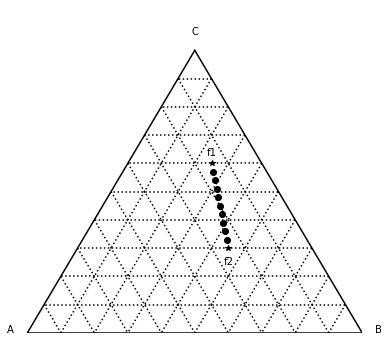

In [3]:
# eda08_01
# factors shown on terniary diagram

a = np.zeros((2,1));
a[:,0] = [0.0,0.0];
b = np.zeros((2,1));
b[:,0] = [1.0,0.0];
c = np.zeros((2,1));
c[:,0] = [0.5,0.5*sqrt(3)];

f1 = np.zeros((3,1));
f1[:,0] = [0.15, 0.25, 0.60];
f1 = f1/np.sum(f1); # factor  1

f2 = np.zeros((3,1));
f2[:,0] = [0.25, 0.45, 0.30];
f2 = f2/np.sum(f2); # factor 2

# terniary diagram
fig1 = plt.figure(1,figsize=(6,6));
ax1 = plt.subplot(1,1,1);
plt.axis( [0, 1, 0, 1] );
plt.axis('off');
# bounding triangle
plt.plot( [a[0,0], b[0,0]], [a[1,0], b[1,0]], 'k-');
plt.plot( [b[0,0], c[0,0]], [b[1,0], c[1,0]], 'k-');
plt.plot( [c[0,0], a[0,0]], [c[1,0], a[1,0]], 'k-');
plt.text(a[0,0]-0.05, a[1,0],'A',horizontalalignment='center');
plt.text(b[0,0]+0.05, b[1,0],'B',horizontalalignment='center');
plt.text(c[0,0], c[1,0]+0.05,'C',horizontalalignment='center');
# first set of grid lines
L=10;
x = np.zeros((2,2))
for j in range(L):
    for k in range(2):
        v1 = float(j+1)/float(L);
        v2 = (1.0-v1)*float(k);
        v3 = 1.0 - (v1+v2);
        x[:,k]=(v1*a+v2*b+v3*c).ravel();
    plt.plot( [x[0,0], x[0,1]], [x[1,0], x[1,1]], 'k:' );
# second set of grid lines
L=10;
for j in range(L):
    for k in range(2):
        v3 = float(j+1)/float(L);
        v1 =(1-v3)*float(k);
        v2 = 1.0 - (v1+v3);
        x[:,k]=(v1*a+v2*b+v3*c).ravel();
    plt.plot( [x[0,0], x[0,1]], [x[1,0], x[1,1]], 'k:' );
#third set of grid lines
L=10;
for j in range(L):
    for k in range(2):
        v2 = float(j+1)/float(L);
        v1 = (1-v2)*float(k);
        v3 = 1.0 - (v1+v2);
        x[:,k]=(v1*a+v2*b+v3*c).ravel();
    plt.plot( [x[0,0], x[0,1]], [x[1,0], x[1,1]], 'k:' );
    
# plot factors
y = f1[0]*a+f1[1]*b+f1[2]*c;
plt.plot( y[0], y[1], 'k*' );
plt.text(y[0], y[1]+0.025,'f1',horizontalalignment='center');
y = f2[0]*a+f2[1]*b+f2[2]*c;
plt.plot( y[0], y[1], 'k*' );
plt.text(y[0], y[1]-0.05,'f2',horizontalalignment='center');

# create and plot samples lying between f1 and f2
N=10;
for j in range(N-1):
    c1=float(j+1)/float(N);
    c2=1-c1;
    s = c1*f1 + c2*f2;
    y = s[0]*a+s[1]*b+s[2]*c;
    plt.plot( y[0], y[1], 'ko' );
    
plt.show();


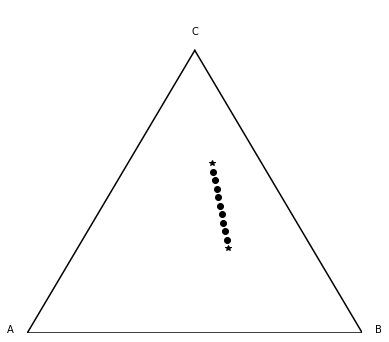

In [4]:
# eda08_02
# factors shown on terniary diagram
# this is eda08_01 w/o the grid lines and w/o annotation of factors

a = np.zeros((2,1));
a[:,0] = [0.0,0.0];
b = np.zeros((2,1));
b[:,0] = [1.0,0.0];
c = np.zeros((2,1));
c[:,0] = [0.5,0.5*sqrt(3)];

f1 = np.zeros((3,1));
f1[:,0] = [0.15, 0.25, 0.60];
f1 = f1/np.sum(f1); # factor  1

f2 = np.zeros((3,1));
f2[:,0] = [0.25, 0.45, 0.30];
f2 = f2/np.sum(f2); # factor 2

# terniary diagram
fig1 = plt.figure(1,figsize=(6,6));
ax1 = plt.subplot(1,1,1);
plt.axis( [0, 1, 0, 1] );
plt.axis('off');
# bounding triangle
plt.plot( [a[0,0], b[0,0]], [a[1,0], b[1,0]], 'k-');
plt.plot( [b[0,0], c[0,0]], [b[1,0], c[1,0]], 'k-');
plt.plot( [c[0,0], a[0,0]], [c[1,0], a[1,0]], 'k-');
plt.text(a[0,0]-0.05, a[1,0],'A',horizontalalignment='center');
plt.text(b[0,0]+0.05, b[1,0],'B',horizontalalignment='center');
plt.text(c[0,0], c[1,0]+0.05,'C',horizontalalignment='center');

# plot factors
y = f1[0]*a+f1[1]*b+f1[2]*c;
plt.plot( y[0], y[1], 'k*' );
y = f2[0]*a+f2[1]*b+f2[2]*c;
plt.plot( y[0], y[1], 'k*' );

# create and plot samples lying between f1 and f2
N=10;
for j in range(N-1):
    c1=float(j+1)/float(N);
    c2=1-c1;
    s = c1*f1 + c2*f2;
    y = s[0]*a+s[1]*b+s[2]*c;
    plt.plot( y[0], y[1], 'ko' );
    
plt.show();

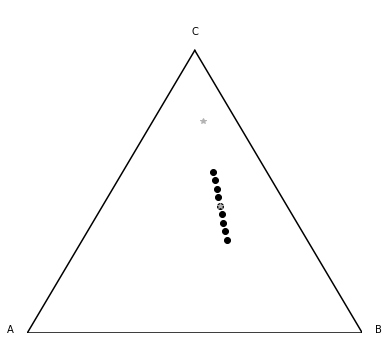

In [5]:
# eda08_03
# factors shown on terniary diagram
# this is eda08_02 with a different choice of factors

a = np.zeros((2,1));
a[:,0] = [0.0,0.0];
b = np.zeros((2,1));
b[:,0] = [1.0,0.0];
c = np.zeros((2,1));
c[:,0] = [0.5,0.5*sqrt(3)];

f1 = np.zeros((3,1));
f1[:,0] = [0.15, 0.25, 0.60];
f1 = f1/np.sum(f1); # factor  1

f2 = np.zeros((3,1));
f2[:,0] = [0.25, 0.45, 0.30];
f2 = f2/np.sum(f2); # factor 2

f1a = 0.5*(f1+f2); # factor  1a
f2a = f1+0.5*(f1-f2); # factor 2a 

# terniary diagram
fig1 = plt.figure(1,figsize=(6,6));
ax1 = plt.subplot(1,1,1);
plt.axis( [0, 1, 0, 1] );
plt.axis('off');
# bounding triangle
plt.plot( [a[0,0], b[0,0]], [a[1,0], b[1,0]], 'k-');
plt.plot( [b[0,0], c[0,0]], [b[1,0], c[1,0]], 'k-');
plt.plot( [c[0,0], a[0,0]], [c[1,0], a[1,0]], 'k-');
plt.text(a[0,0]-0.05, a[1,0],'A',horizontalalignment='center');
plt.text(b[0,0]+0.05, b[1,0],'B',horizontalalignment='center');
plt.text(c[0,0], c[1,0]+0.05,'C',horizontalalignment='center');

# create and plot samples lying between f1 and f2
N=10;
for j in range(N-1):
    c1=float(j+1)/float(N);
    c2=1-c1;
    s = c1*f1 + c2*f2;
    y = s[0]*a+s[1]*b+s[2]*c;
    plt.plot( y[0], y[1], 'ko' );
    
# plot factors
y = f1a[0]*a+f1a[1]*b+f1a[2]*c;
plt.plot( y[0], y[1], 'k*', color=(0.7,0.7,0.7) );
y = f2a[0]*a+f2a[1]*b+f2a[2]*c;
plt.plot( y[0], y[1], 'k*', color=(0.7,0.7,0.7) );
    
plt.show();

max relative error in CF   2.9341870488937076e-15
factor 0
    SiO2 -0.908829
    TiO2 -0.024638
    Al203 -0.275168
    FeO-total -0.177851
    MgO -0.141341
    CaO -0.209989
    Na2O -0.044611
    K2O -0.003430
factor 1
    SiO2 0.007684
    TiO2 -0.037474
    Al203 -0.301583
    FeO-total -0.018421
    MgO 0.923193
    CaO -0.226917
    Na2O -0.058457
    K2O -0.007204
factor 2
    SiO2 -0.161689
    TiO2 -0.126343
    Al203 0.567828
    FeO-total -0.659205
    MgO 0.255748
    CaO 0.365682
    Na2O -0.041738
    K2O -0.006464
factor 3
    SiO2 0.209819
    TiO2 0.151367
    Al203 0.176021
    FeO-total -0.427461
    MgO -0.118643
    CaO -0.780043
    Na2O 0.302367
    K2O 0.073403
factor 4
    SiO2 0.309495
    TiO2 -0.100476
    Al203 -0.670083
    FeO-total -0.585155
    MgO -0.195193
    CaO 0.207980
    Na2O -0.145318
    K2O 0.015035
 


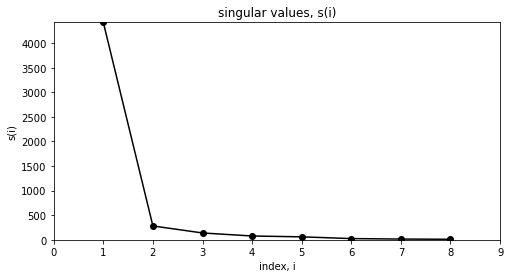

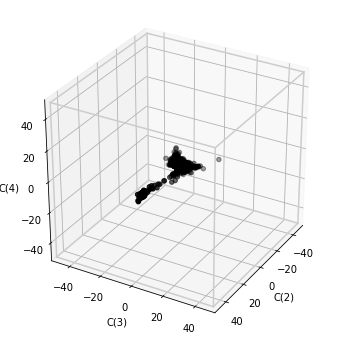

In [6]:
# eda08_04
# factor analysis on Atlantic Rocks dataset
# using singular value decomposition

# load data
S = np.genfromtxt('rocks.txt', delimiter='\t')
N, M = np.shape(S);
Smax = np.amax(S);
sio2 = np.zeros((N,1));
sio2[:,0]  = S[:,0];  # SiO2
tio2 = np.zeros((N,1));
tio2[:,0] = S[:,1];   # TiO2
als03 = np.zeros((N,1));
als03[:,0] = S[:,2];  # Al203
feot = np.zeros((N,1));
feot[:,0] = S[:,3];   # FeO-total
mgo = np.zeros((N,1));
mgo[:,0] = S[:,4];    # MgO
cao = np.zeros((N,1));
cao[:,0] = S[:,5];    # CaO
na20 = np.zeros((N,1));
na20[:,0] = S[:,6];   # Na2O
k20 = np.zeros((N,1));
k20[:,0] = S[:,7];    # K2O

# compute factors and factor loadings using singular value decompostion
[U, sigma, VT] = la.svd(S,full_matrices=False);
sh = np.shape(sigma);
Ns = sh[0];
F = np.copy(VT);
C = np.matmul( U, np.diag(sigma) );

# check error of reconstruction
Emax = np.amax(S - np.matmul(C,F));
print('max relative error in CF  ', Emax/Smax);

# plot singular values
fig1 = plt.figure(1,figsize=(8,4));
ax1 = plt.subplot(1,1,1);
plt.axis( [0, Ns+1, 0, np.max(sigma)] );
plt.plot( np.linspace(1,Ns,Ns), sigma, 'k-' );
plt.plot( np.linspace(1,Ns,Ns), sigma, 'ko' );
plt.title('singular values, s(i)');
plt.xlabel('index, i');
plt.ylabel('s(i)');

# print first five factors
for j in range(5):
    fj = np.zeros((M,1));
    fj[:,0] = F[j,:];
    printstr = "factor %d" % (j);
    print(printstr);
    printstr = "    SiO2 %f"      % (fj[0]);
    print(printstr);
    printstr = "    TiO2 %f"      % (fj[1]);
    print(printstr);
    printstr = "    Al203 %f"     % (fj[2]);
    print(printstr);
    printstr = "    FeO-total %f" % (fj[3]);
    print(printstr);
    printstr = "    MgO %f"       % (fj[4]);
    print(printstr);
    printstr = "    CaO %f"       % (fj[5]);
    print(printstr);
    printstr = "    Na2O %f"      % (fj[6]);
    print(printstr);
    printstr = "    K2O %f"       % (fj[7]);
    print(printstr);
print(' ');

cmin=(-50);
cmax=50;
fig2 = plt.figure(2,figsize=(6,6));
ax1 = fig2.add_subplot(111, projection='3d')
ax1.axes.set_xlim3d(left=cmin, right=cmax);
ax1.axes.set_ylim3d(bottom=cmin, top=cmax);
ax1.axes.set_zlim3d(bottom=cmin, top=cmax);
ax1.view_init(30, 30)

ax1.scatter( xs=C[:,1], ys=C[:,2], zs=C[:,3], color=(0,0,0) );
ax1.plot( xs=[cmin,cmin], ys=[cmin,cmin], zs=[cmin,cmax], color=(0.8,0.8,0.8) );
ax1.plot( xs=[cmin,cmin], ys=[cmin,cmax], zs=[cmin,cmin], color=(0.8,0.8,0.8) );
ax1.plot( xs=[cmin,cmax], ys=[cmin,cmin], zs=[cmin,cmin], color=(0.8,0.8,0.8) );

ax1.plot( xs=[cmax,cmax], ys=[cmax,cmax], zs=[cmax,cmin], color=(0.8,0.8,0.8) );
ax1.plot( xs=[cmax,cmax], ys=[cmax,cmin], zs=[cmax,cmax], color=(0.8,0.8,0.8) );
ax1.plot( xs=[cmax,cmin], ys=[cmax,cmax], zs=[cmax,cmax], color=(0.8,0.8,0.8) );

ax1.plot( xs=[cmax,cmin], ys=[cmin,cmin], zs=[cmax,cmax], color=(0.8,0.8,0.8) );
ax1.plot( xs=[cmax,cmax], ys=[cmin,cmin], zs=[cmax,cmin], color=(0.8,0.8,0.8) );

ax1.plot( xs=[cmin,cmin], ys=[cmax,cmin], zs=[cmax,cmax], color=(0.8,0.8,0.8) );
ax1.plot( xs=[cmin,cmin], ys=[cmax,cmax], zs=[cmax,cmin], color=(0.8,0.8,0.8) );

ax1.plot( xs=[cmax,cmax], ys=[cmax,cmin], zs=[cmin,cmin], color=(0.8,0.8,0.8) );
ax1.plot( xs=[cmax,cmin], ys=[cmax,cmax], zs=[cmin,cmin], color=(0.8,0.8,0.8) );

ax1.set_xlabel('C(2)');
ax1.set_ylabel('C(3)');
ax1.set_zlabel('C(4)');
plt.show();

In [7]:
# eda08_05
# simple example of varimax procedure applued to 2 factors

# define two non-spiky factors, fs and ft
M=4;
fA = np.zeros((M,1));
fA[:,0] = [ 1.0,  1.0,  1.0,  1.0 ];
fB = np.zeros((M,1));
fB[:,0] = [ 1.0, -1.0,  1.0, -1.0 ];
fA = fA / sqrt( np.matmul(fA.T, fA )); # normalize to unit length
fB = fB / sqrt( np.matmul(fB.T, fB )); # normalize to unit length

# standard varimax procedure to determine rotation angle q
u = np.power(fA,2) - np.power(fB,2);
v = 2.0 * np.multiply(fA, fB);

A = 2*M*np.matmul(u.T,v);
B = np.sum(u)*np.sum(v);
top = A - B;

C = M*(np.matmul(u.T,u)-np.matmul(v.T,v));
D = (np.sum(u)**2)-(np.sum(v)**2);
bot =  C - D;

q = 0.25 * atan2(top,bot);

# rotate factors
cq = cos(q);
sq = sin(q);
fAp =  cq*fA + sq*fB;
fBp = -sq*fA + cq*fB;

# display results
print("fA  %.3f %.3f. %.3f %.3f" % (fA[0], fA[1], fA[2], fA[3]) );
print("fB  %.3f %.3f. %.3f %.3f" % (fB[0], fB[1], fB[2], fB[3]) );
print(' ');
print("fAp %.3f %.3f. %.3f %.3f" % (fAp[0], fAp[1], fAp[2], fAp[3]) );
print("FBp %.3f %.3f. %.3f %.3f" % (fBp[0], fBp[1], fBp[2], fBp[3]) );

fA  0.500 0.500. 0.500 0.500
fB  0.500 -0.500. 0.500 -0.500
 
fAp 0.707 0.000. 0.707 0.000
FBp 0.000 -0.707. 0.000 -0.707


max relative error in CF   0.05663026082140537
max relative error in CPFP 0.056630260821405376


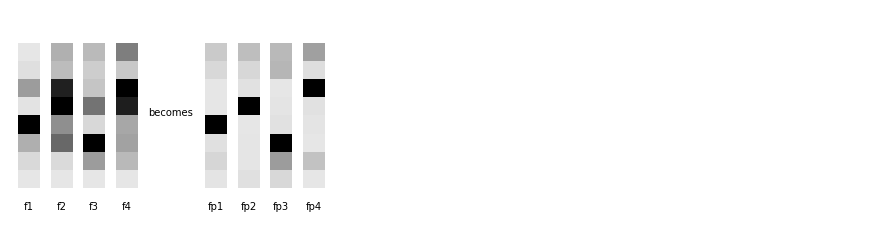

In [2]:
# eda08_06
# factor analysis on Atlabtic Rocks dataset
# using singular value decomposition
# and the varimax procedure

# load data
S = np.genfromtxt('rocks.txt', delimiter='\t')
N, M = np.shape(S);
Smax = np.amax(S);

# compute factors and factor loadings using singular value decompostion
[U, s, VT] = la.svd(S,full_matrices=False);

# check error of reconstruction
# Emax = np.amax(S - np.matmul(np.matmul(U,np.diag(s)),VT));
# print('max relative error in USVT', Emax/Smax);

# keep only first five singular values
P=5;
F = np.copy(VT[0:P,:]);
C = np.matmul( U[:,0:P], np.diag(s[0:P]));

# check error of reconstruction
Emax = np.amax(S - np.matmul(C,F));
print('max relative error in CF  ', Emax/Smax);

# spike these factors using the varimax procedure
k = [1, 2, 3, 4];
Nk = len(k);

# initial rotated factor matrix, FP, abd rotation matrix, MR
MR=np.identity(P);
FP=np.copy(F);

fA = np.zeros((M,1));
fB = np.zeros((M,1));
fAp = np.zeros((M,1));
fBp = np.zeros((M,1));
mA = np.zeros((P,1));
mB = np.zeros((P,1));
mAp = np.zeros((P,1));
mBp = np.zeros((P,1));
for iter in range(3):
    for ii in range(Nk):
        for jj in range(ii+1,Nk):
            # spike factors i and j
            i=k[ii];
            j=k[jj];
            # copy factors from matrix to vectors
            fA[:,0] = np.copy(FP[i,:]);
            fB[:,0] = np.copy(FP[j,:]);
            # standard varimax procedure to determine rotation angle q
            u = np.power(fA,2) - np.power(fB,2);
            v = 2.0 * np.multiply(fA, fB);
            AA = 2*M*np.matmul(u.T,v);
            BB = np.sum(u)*np.sum(v);
            top = AA - BB;
            CC = M*(np.matmul(u.T,u)-np.matmul(v.T,v));
            DD = (np.sum(u)**2)-(np.sum(v)**2);
            bot =  CC - DD;
            q = 0.25 * atan2(top,bot);
            # rotate factors
            cq = cos(q);
            sq = sin(q);
            fAp =  cq*fA + sq*fB;
            fBp = -sq*fA + cq*fB;
            # put back into factor matrix, FP
            FP[i,:] = fAp.ravel();
            FP[j,:] = fBp.ravel();
            # accumulate rotation
            mA[:,0] = np.copy(MR[i,:]);
            mB[:,0] = np.copy(MR[j,:]);
            mAp =  cq*mA + sq*mB;
            mBp = -sq*mA + cq*mB;
            MR[i,:] = mAp.ravel();
            MR[j,:] = mBp.ravel();

# new factor loadings
CP = np.matmul(C,MR.T);
# check error of reconstruction
Emax = np.amax(S - np.matmul(CP,FP));
print('max relative error in CPFP', Emax/Smax);

Fa = np.abs(F);
FPa = np.abs(FP);
eda_draw( 'title f1', Fa[1,:], 'title f2', Fa[2,:], 'title f3', Fa[3,:], 'title f4', Fa[4,:], 'becomes', 'title fp1', FPa[1,:], 'title fp2', FPa[2,:], 'title fp3', FPa[3,:], 'title fp4', FPa[4,:]);


witout weighting, max relative error in CF   0.1996805000838976
with   weighting, max relative error in CF   0.20647824824129826


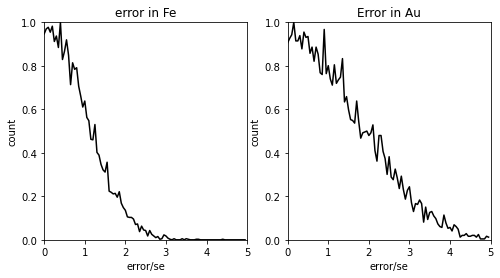

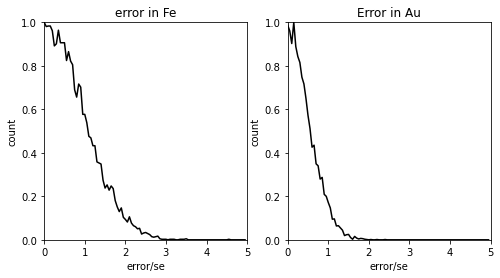

In [10]:
# eda08_07
# comparison of weighted and unweithted factor analysis

# Part 1: Make synthetic chemical data with a wide range of concentrations

# 7 elements, three factors
M = 7;
P = 3;

# typical analytic errors
se = np.zeros((M,1));
#         [Fe        Cu        Zn        Pb        As        Ag        Au]
se[:,0] = [0.010000, 0.010000, 0.010000, 0.001000, 0.001000, 0.0000010, 0.0000001 ];

# factors as column vectors
v1 = np.zeros((M,1));
v2 = np.zeros((M,1));
v3 = np.zeros((M,1));
#         [Fe        Cu        Zn        Pb        As        Ag        Au]
v1[:,0] = [0.200000, 0.004000, 0.010000, 0.010000, 0.001000, 0.0000100, 0.0000010 ];
v2[:,0] = [0.050000, 0.180000, 0.180000, 0.030000, 0.000200, 0.0000400, 0.0000005 ];
v3[:,0] = [0.100000, 0.080000, 0.110000, 0.010000, 0.000700, 0.0000100, 0.0000001 ];

# factor matrix
F = np.concatenate( (v1.T, v2.T, v3.T), axis=0 );

# randomly chosen loadings
N = 10000;
c1 = np.random.uniform(0.0,1.0,(N,1));
c2 = np.random.uniform(0.0,1.0,(N,1));
c3 = 1-(c1+c2);
C = np.concatenate( (c1, c2, c3), axis=1 )

# true sample matrix
Strue = np.matmul(C,F);
Sobs = np.zeros((N,M));

# observed sample matrix is true plus Normally-distributed random noise
for i in range(M):
    Sobs[:,i] = Strue[:,i] + np.random.normal(0,se[i,0],N);
Smax = np.amax(Sobs);
              
# histogram limts
Lh = 100;
Fe_min = 0;
Fe_max = 5;
Au_min = 0;
Au_max = 5;

# Part two factor analysis without weighting

# factors F and loadings F
[U1, s1, V1T] = la.svd(Sobs,full_matrices=False);
Fpre1 = V1T; # factors
Cpre1 = np.matmul( U1, np.diag(s1) ); # loadings

# P significant factors
Fpre1P = np.copy( Fpre1[0:P,:] );
Cpre1P = np.copy( Cpre1[:,0:P] );
Spre1P = np.matmul( Cpre1P, Fpre1P );

fig1 = plt.figure(1,figsize=(8,4));

# error
e1 = np.abs(Strue-Spre1P);
Emax = np.max(e1);
print('witout weighting, max relative error in CF  ', Emax/Smax);

c, e = np.histogram( e1[:,0]/se[0,0], Lh, (Fe_min,Fe_max));
Nc = len(c);
Ne = len(e);
count = np.zeros((Nc,1));
count[:,0]=c;
edges = np.zeros((Ne-1,1));
edges[:,0]=e[0:Ne-1];

ax1 = plt.subplot(1,2,1);
plt.axis( [Fe_min, Fe_max, 0, 1] );
plt.plot(edges,count/np.max(count),'k-');
plt.title('error in Fe');
plt.xlabel('error/se');
plt.ylabel('count');

c, e = np.histogram( e1[:,M-1]/se[M-1,0], Lh,(Au_min,Au_max));
Nc = len(c);
Ne = len(e);
count = np.zeros((Nc,1));
count[:,0]=c;
edges = np.zeros((Ne-1,1));
edges[:,0]=e[0:Ne-1];

ax1 = plt.subplot(1,2,2);
plt.axis( [Au_min, Au_max, 0, 1] );
plt.plot(edges,count/np.max(count),'k-');
plt.title('Error in Au');
plt.xlabel('error/se');
plt.ylabel('count');

# Part three factor analysis with weighting by analytic precision

# factors F and loadings F
w = np.reciprocal(se);
[U2, s2, V2T] = la.svd( np.matmul(Sobs,np.diag(w.ravel())),full_matrices=False);

Fpre2 = np.matmul(V2T,np.diag(se.ravel())); # factors
Cpre2 = np.matmul( U2, np.diag(s2) ); # loadings

# P significant factors
Fpre2P = np.copy( Fpre2[0:P,:] );
Cpre2P = np.copy( Cpre2[:,0:P] );
Spre2P = np.matmul( Cpre2P, Fpre2P );

fig2 = plt.figure(2,figsize=(8,4));

# error
e2 = np.abs(Strue-Spre2P);
# check error of reconstruction
Emax = np.max(e2);
print('with   weighting, max relative error in CF  ', Emax/Smax);

c, e = np.histogram( e2[:,0]/se[0,0], Lh, (Fe_min,Fe_max));
Nc = len(c);
Ne = len(e);
count = np.zeros((Nc,1));
count[:,0]=c;
edges = np.zeros((Ne-1,1));
edges[:,0]=e[0:Ne-1];

ax1 = plt.subplot(1,2,1);
plt.axis( [Fe_min, Fe_max, 0, 1] );
plt.plot(edges,count/np.max(count),'k-');
plt.title('error in Fe');
plt.xlabel('error/se');
plt.ylabel('count');

c, e = np.histogram( e2[:,M-1]/se[M-1,0], Lh,(Au_min,Au_max));
Nc = len(c);
Ne = len(e);
count = np.zeros((Nc,1));
count[:,0]=c;
edges = np.zeros((Ne-1,1));
edges[:,0]=e[0:Ne-1];

ax1 = plt.subplot(1,2,2);
plt.axis( [Au_min, Au_max, 0, 1] );
plt.plot(edges,count/np.max(count),'k-');
plt.title('Error in Au');
plt.xlabel('error/se');
plt.ylabel('count');


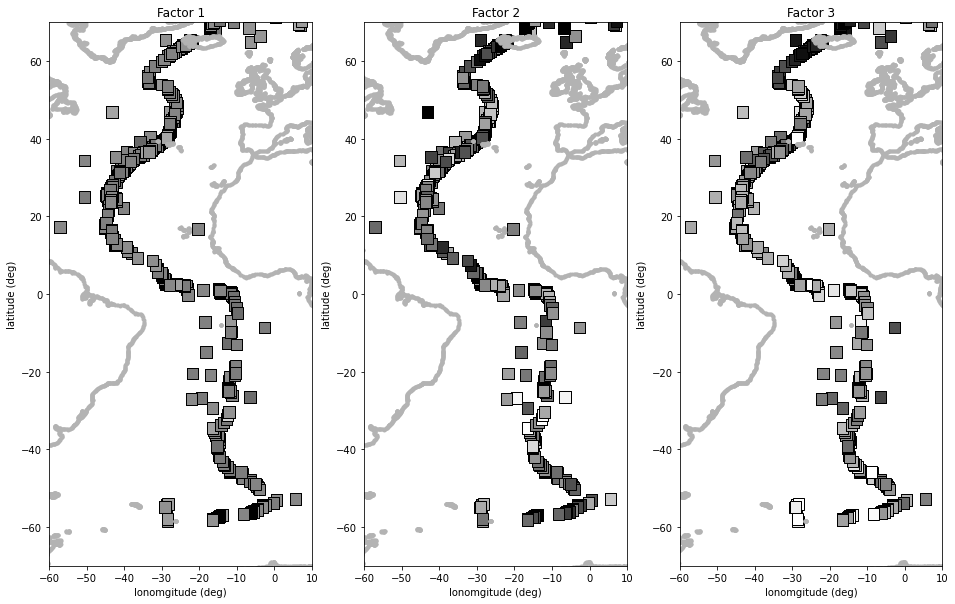

In [12]:
# eda08_08
# factor analysis on Mid Atlantic Ridge Rocks dataset
# Q-mode factors with geographical plots

# load data
D = np.genfromtxt('rocks_with_lat_lon.txt', delimiter='\t')
N, K = np.shape(D);
M=K-2;
lat = np.zeros((N,1));
lat[:,0] = D[:,8];    # lat
lon = np.zeros((N,1));
lon[:,0] = D[:,9];    # lon
S = np.copy(D[:,0:M]);

# svd
[U, s, VT] = la.svd(S.T,full_matrices=False);

# keep only first few singular values
P=4;
FP = np.copy(VT[0:P,:]);
CP = np.matmul( U[:,0:P], np.diag(s[0:P]));

# map bounds
left = -60;
right = 10;
bottom = -70;
top = 70;

# plot
fig1 = plt.figure(1,figsize=(16,10));

# PART 1: factor 1
ax1 = plt.subplot(1,3,1);
plt.axis( [left, right, bottom, top] );

nf = 1;
FPmean = np.mean(FP[nf,:]);
FPstd = np.std(FP[nf,:]);
fmin = -2*FPstd
fmax = 2*FPstd
for i in range(N):
    h = 3;
    c = (FP[nf,i]-fmin)/(fmax-fmin);
    if( c<0.0 ):
        c=0.0;
    elif ( c>1.0 ):
        c=1.0;
    ax1.add_patch( pch.Rectangle( (lon[i,0], lat[i,0]), h, h, fc=(c,c,c), ec=(0.0,0.0,0.0) ) );

plt.xlabel('lonomgitude (deg)');
plt.ylabel('latitude (deg)');
plt.title('Factor 1');

# plot coastlines on maps
coastfile = 'coastdata.txt';
fd = open(coastfile,"r");
NN = 0;
NNMAX = 10000;
mylat = np.zeros((NNMAX,1));
mylon = np.zeros((NNMAX,1));
for i in range(100000):
    line = fd.readline();
    if not line:
        break;
    if( line[0] == '>' ):
        if( NN == 0):
            continue;
        plt.plot( mylon[0:NN,0], mylat[0:NN,0], 'k.', color=(0.7,0.7,0.7) );
        NN=0;
    else:
        latlonstr=line.split();
        mylat[NN,0] = float(latlonstr[1]);
        mylon[NN,0] = float(latlonstr[0]);
        NN=NN+1;
fd.close();

# PART 1: factor 2
ax2 = plt.subplot(1,3,2);
plt.axis( [left, right, bottom, top] );

nf = 2;
FPmean = np.mean(FP[nf,:]);
FPstd = np.std(FP[nf,:]);
fmin = -2*FPstd
fmax = 2*FPstd
for i in range(N):
    h = 3;
    c = (FP[nf,i]-fmin)/(fmax-fmin);
    if( c<0.0 ):
        c=0.0;
    elif ( c>1.0 ):
        c=1.0;
    ax2.add_patch( pch.Rectangle( (lon[i,0], lat[i,0]), h, h, fc=(c,c,c), ec=(0.0,0.0,0.0) ) );

plt.xlabel('lonomgitude (deg)');
plt.ylabel('latitude (deg)');
plt.title('Factor 2');

# plot coastlines on maps
coastfile = 'coastdata.txt';
fd = open(coastfile,"r");
NN = 0;
NNMAX = 10000;
mylat = np.zeros((NNMAX,1));
mylon = np.zeros((NNMAX,1));
for i in range(100000):
    line = fd.readline();
    if not line:
        break;
    if( line[0] == '>' ):
        if( NN == 0):
            continue;
        plt.plot( mylon[0:NN,0], mylat[0:NN,0], 'k.', color=(0.7,0.7,0.7) );
        NN=0;
    else:
        latlonstr=line.split();
        mylat[NN,0] = float(latlonstr[1]);
        mylon[NN,0] = float(latlonstr[0]);
        NN=NN+1;
fd.close();

# PART 3: factor 3
ax3 = plt.subplot(1,3,3);
plt.axis( [left, right, bottom, top] );

nf = 3;
FPmean = np.mean(FP[nf,:]);
FPstd = np.std(FP[nf,:]);
fmin = -2*FPstd
fmax = 2*FPstd
for i in range(N):
    h = 3;
    c = (FP[nf,i]-fmin)/(fmax-fmin);
    if( c<0.0 ):
        c=0.0;
    elif ( c>1.0 ):
        c=1.0;
    ax3.add_patch( pch.Rectangle( (lon[i,0], lat[i,0]), h, h, fc=(c,c,c), ec=(0.0,0.0,0.0) ) );

plt.xlabel('lonomgitude (deg)');
plt.ylabel('latitude (deg)');
plt.title('Factor 3');

# plot coastlines on maps
coastfile = 'coastdata.txt';
fd = open(coastfile,"r");
NN = 0;
NNMAX = 10000;
mylat = np.zeros((NNMAX,1));
mylon = np.zeros((NNMAX,1));
for i in range(100000):
    line = fd.readline();
    if not line:
        break;
    if( line[0] == '>' ):
        if( NN == 0):
            continue;
        plt.plot( mylon[0:NN,0], mylat[0:NN,0], 'k.', color=(0.7,0.7,0.7) );
        NN=0;
    else:
        latlonstr=line.split();
        mylat[NN,0] = float(latlonstr[1]);
        mylon[NN,0] = float(latlonstr[0]);
        NN=NN+1;
fd.close();


plt.show();



Images: 399
start year 1970 month 1
end   year 2003 month 3


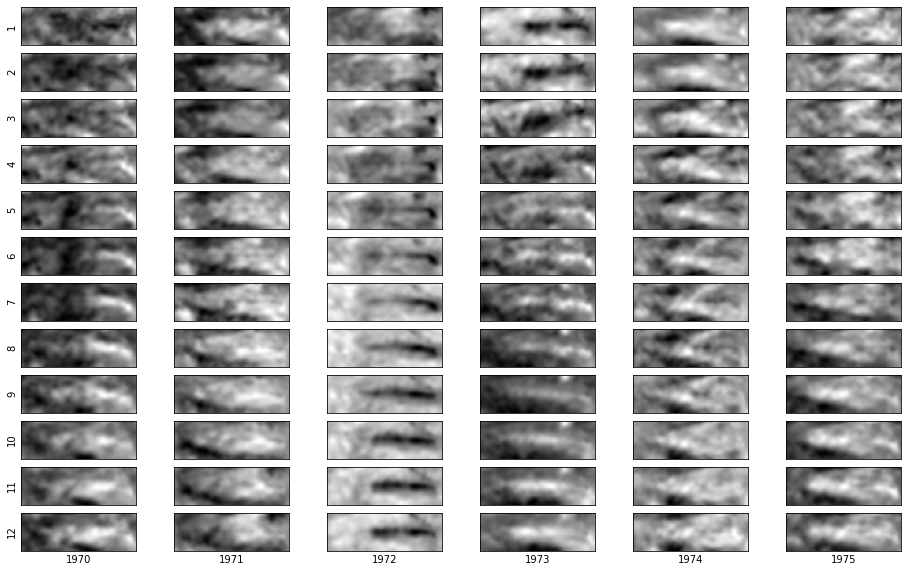

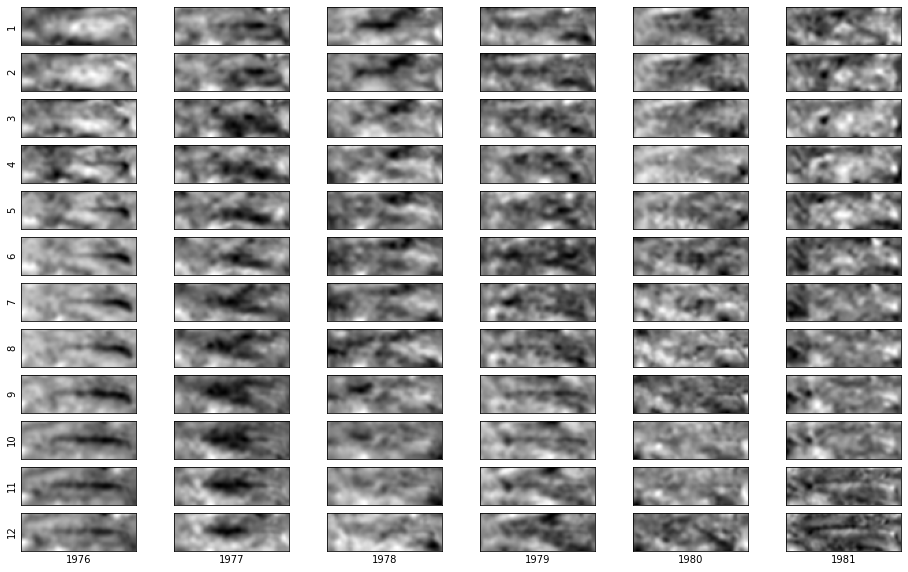

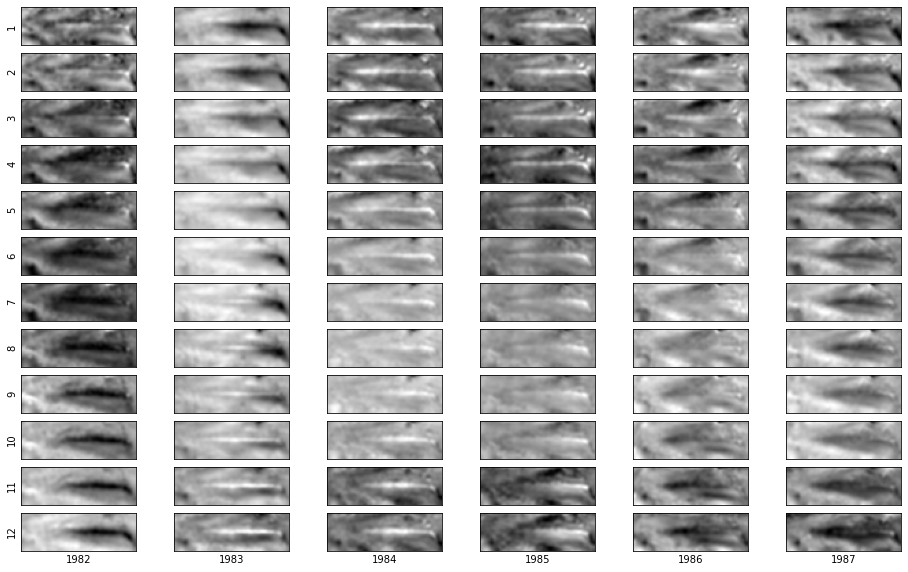

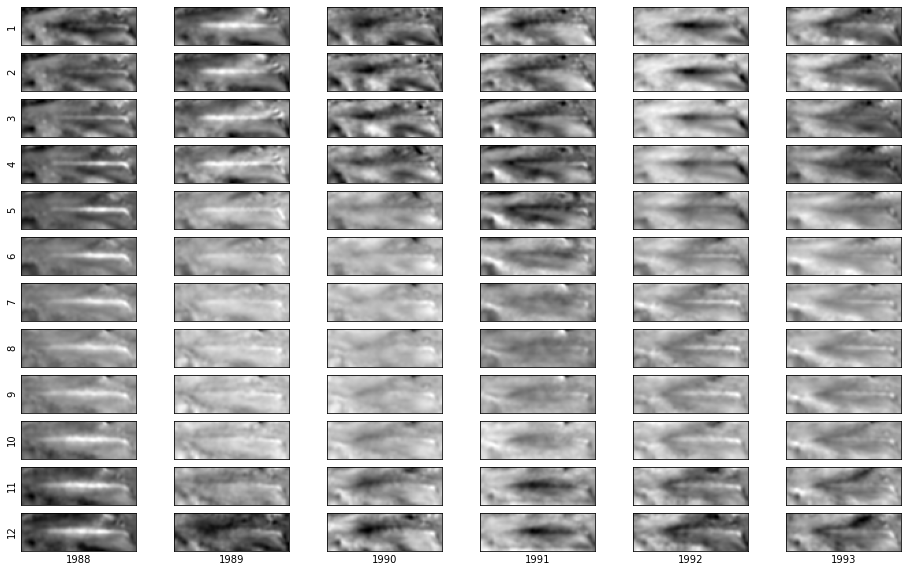

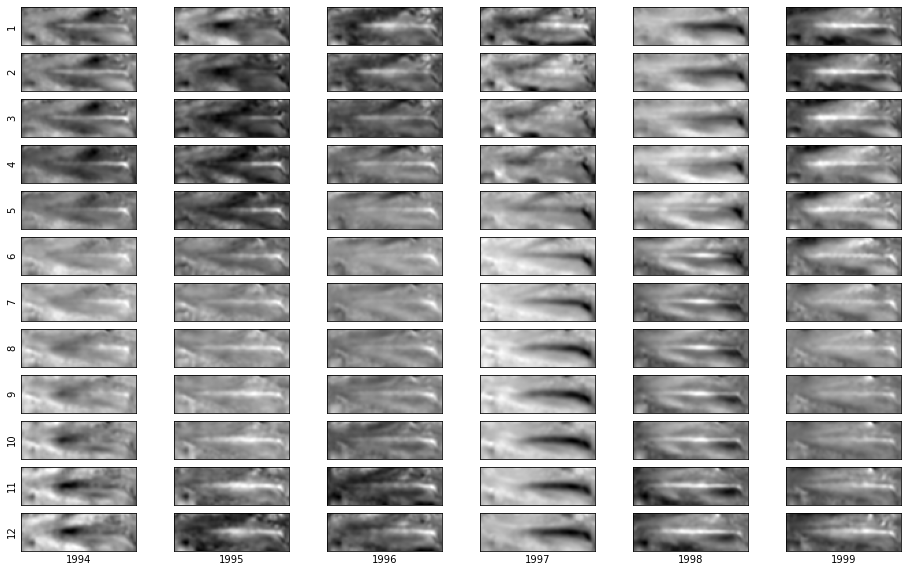

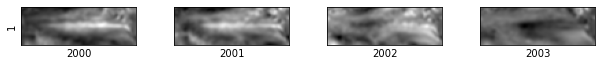

In [19]:
# eda08_09
# CAC Pacific Sea Surface Temperature (SST) dataset
# read in and plot the data

# load the data
D = np.genfromtxt('cac_sst.txt', delimiter='\t')

# set up sizes of arrays
I, J = np.shape(D);
NBLOCK=85;
NLON = NBLOCK-1;
NLAT = J-1;
IMAGES = floor(I/NBLOCK);
Dt = 1/12;
print('Images:',IMAGES)

# arrays for SST, date, lats, lons
SST = np.zeros((NLON,NLAT,IMAGES));
thedate = np.zeros((IMAGES,1)); # in month.year format
theyear = np.zeros((IMAGES,1)); # year extracted from thedate
themonth = np.zeros((IMAGES,1)); # month extracted from thedate
lats=np.zeros((NLAT,1));
lons=np.zeros((NLON,1));

# cut up data into SST arrays
lats = np.copy(D[0,1:J]).T;
lons = np.copy(D[1:NBLOCK,0]);
for j in range(IMAGES):
    k1 = j*NBLOCK;
    k2 = k1+NLON;
    thedate[j,0]=D[k1,0];
    themonth[j,0]=floor(thedate[j,0]);
    theyear[j,0]=floor(10000*(thedate[j,0]-themonth[j,0])+0.1);
    SST[:,:,j] = np.copy(D[k1+1:k2+1,1:J]);
    
print("start year %d month %d" % (theyear[0,0], themonth[0,0]));
print("end   year %d month %d" % (theyear[IMAGES-1,0], themonth[IMAGES-1,0]));
    
# some definitions related to plotting
MONTHS=12;
YEARS=ceil(IMAGES/12);
YBLOCKSIZE = 6;
YBLOCKS = ceil(YEARS/YBLOCKSIZE);

# colormap
bw = np.zeros((256,4));
v = (255 - np.linspace( 0, 255, 256 ))/255;
bw[:,0] = v;
bw[:,1] = v;
bw[:,2] = v;
bw[:,3] = np.ones(256);
bwcmap = ListedColormap(bw);

# plor data, 12 months by six years of maps per figure
lastmonth = (IMAGES % YBLOCKSIZE*12) % YBLOCKSIZE ;
done=0;
for yb in range(YBLOCKS):
    fig = plt.figure(yb+2,figsize=(16,10));
    for m in range(MONTHS):
        for y in range(YBLOCKSIZE):
            j = m+MONTHS*y+MONTHS*YBLOCKSIZE*yb;
            k = y + m*YBLOCKSIZE;
            if( j>=IMAGES):
                done=1;
                break;
            ax = plt.subplot(MONTHS, YBLOCKSIZE, k+1);
            left=0;
            right=3.0;
            bottom=0.0;
            top=1.0;
            plt.axis( [left, right, bottom, top] );
            ax.xaxis.set_ticks([]);
            ax.yaxis.set_ticks([]);
            MAP=np.flipud(SST[:,:,j].T); # reorient so it plots as map
            MAPmin = np.min(MAP);
            MAPmax = np.max(MAP);
            MAPrange = MAPmax-MAPmin;
            if( MAPrange<=0.0 ):
                MAPrange=1;
            plt.imshow( (MAP-MAPmin)/MAPrange, cmap=bwcmap, vmin=0, vmax=1, extent=(left,right,bottom,top) );
            if( y==0 ):
                plt.ylabel("%d" % (themonth[j,0]) );
            if( (m==11) or ((yb==(YBLOCKS-1)) and (m==lastmonth))  ):
                plt.xlabel("%d" % (theyear[j,0]) );
        if( done==1 ):
            break;
    if( done==1 ):
            break;
    plt.show();


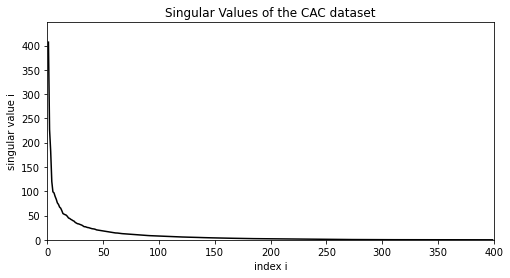

In [15]:
#  eda08_10
# CAC Pacific Sea Surface Temperature (SST) dataset
# plot singular values

# load the data
D = np.genfromtxt('cac_sst.txt', delimiter='\t')

# set up sizes of arrays
I, J = np.shape(D);
NBLOCK=85;
NLON = NBLOCK-1;
NLAT = J-1;
IMAGES = floor(I/NBLOCK);
Dt = 1/12;

# arrays for SST, date, lats, lons
SST = np.zeros((NLON,NLAT,IMAGES));
thedate = np.zeros((IMAGES,1)); # in month.year format
theyear = np.zeros((IMAGES,1)); # year extracted from thedate
themonth = np.zeros((IMAGES,1)); # month extracted from thedate
lats=np.zeros((NLAT,1));
lons=np.zeros((NLON,1));

# cut up data into SST arrays
lats = np.copy(D[0,1:J]).T;
lons = np.copy(D[1:NBLOCK,0]);
for j in range(IMAGES):
    k1 = j*NBLOCK;
    k2 = k1+NLON;
    thedate[j,0]=D[k1,0];
    themonth[j,0]=floor(thedate[j,0]);
    theyear[j,0]=floor(10000*(thedate[j,0]-themonth[j,0])+0.1);
    SST[:,:,j] = np.copy(D[k1+1:k2+1,1:J]);
    
    
# some definitions related to plotting
MONTHS=12;
YEARS=ceil(IMAGES/12);
YBLOCKSIZE = 6;
YBLOCKS = ceil(YEARS/YBLOCKSIZE);

# fold out into array
SSTV = np.zeros( (IMAGES, NLAT*NLON) );
for j in range(IMAGES):
    for p in range(NLAT):
        for q in range(NLON):
            k = p + q*NLAT;
            SSTV[j,k] = SST[q, p, j];

# singular value decomposition
[U, sigma, VT] = la.svd(SSTV,full_matrices=False);
sh = np.shape(sigma);
Ns = sh[0];
F = np.copy(VT);
C = np.matmul( U, np.diag(sigma) );

fig1 = plt.figure(1,figsize=(8,4));
ax1 = plt.subplot(1,1,1);
plt.axis( [0, Ns+1, 0, 1.1*np.max(sigma)] );
plt.plot( np.linspace(1,Ns,Ns), sigma, 'k-');
plt.title('Singular Values of the CAC dataset');
plt.xlabel('index i');
plt.ylabel('singular value i');

plt.show();



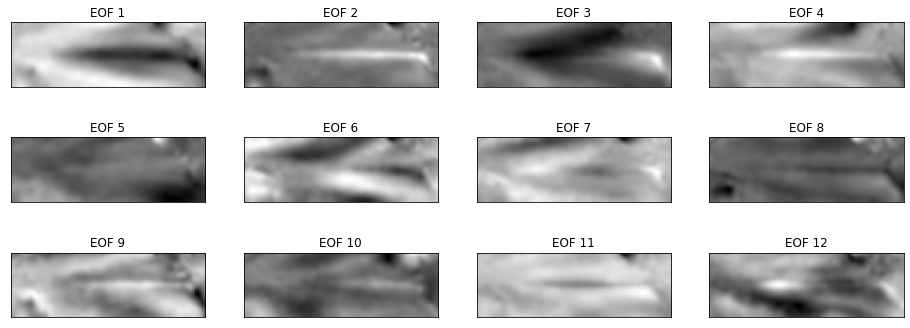

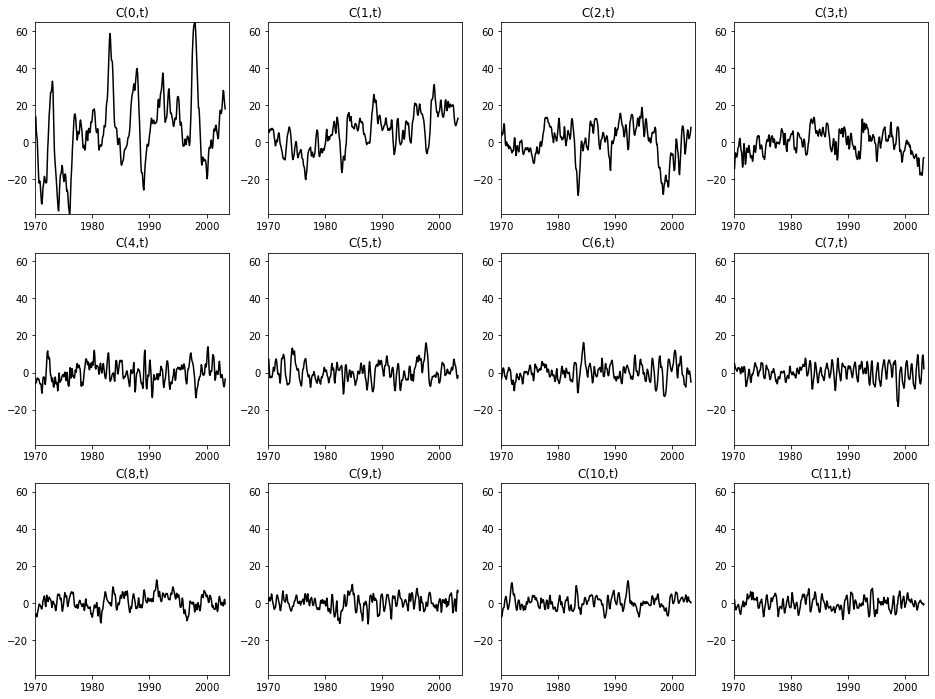

In [17]:
# eda08_11
# CAC Pacific Sea Surface Temperature (SST) dataset
# plot factors as maps and loadings as timeseries

# load the data
D = np.genfromtxt('cac_sst.txt', delimiter='\t')

# set up sizes of arrays
I, J = np.shape(D);
NBLOCK=85;
NLON = NBLOCK-1;
NLAT = J-1;
IMAGES = floor(I/NBLOCK);
Dt = 1/12;

# arrays for SST, date, lats, lons
SST = np.zeros((NLON,NLAT,IMAGES));
thedate = np.zeros((IMAGES,1)); # in month.year format
theyear = np.zeros((IMAGES,1)); # year extracted from thedate
themonth = np.zeros((IMAGES,1)); # month extracted from thedate
lats=np.zeros((NLAT,1));
lons=np.zeros((NLON,1));

# cut up data into SST arrays
lats = np.copy(D[0,1:J]).T;
lons = np.copy(D[1:NBLOCK,0]);
for j in range(IMAGES):
    k1 = j*NBLOCK;
    k2 = k1+NLON;
    thedate[j,0]=D[k1,0];
    themonth[j,0]=floor(thedate[j,0]);
    theyear[j,0]=floor(10000*(thedate[j,0]-themonth[j,0])+0.1);
    SST[:,:,j] = np.copy(D[k1+1:k2+1,1:J]);
    
    
# some definitions related to plotting
MONTHS=12;
YEARS=ceil(IMAGES/12);
YBLOCKSIZE = 6;
YBLOCKS = ceil(YEARS/YBLOCKSIZE);

# fold out into array
SSTV = np.zeros( (IMAGES, NLAT*NLON) );
for j in range(IMAGES):
    for p in range(NLAT):
        for q in range(NLON):
            k = p + q*NLAT;
            SSTV[j,k] = SST[q, p, j];

# singular value decomposition
[U, sigma, VT] = la.svd(SSTV,full_matrices=False);
sh = np.shape(sigma);
Ns = sh[0];

# keep only P singular values
P=Ns;
F = np.copy(VT[0:P,:]);
C = np.matmul( U[:,0:P], np.diag(sigma[0:P]));

# fold EOF's back into maps
Nf = 12;  # just do a few EOF'
SSTF = np.zeros((NLON,NLAT,Nf));
for j in range(Nf):
    for p in range(NLAT):
        for q in range(NLON):
            k = p + q*NLAT;
            SSTF[ q, p, j ] = F[j,k];
            
# colormap
bw = np.zeros((256,4));
v = (255 - np.linspace( 0, 255, 256 ))/255;
bw[:,0] = v;
bw[:,1] = v;
bw[:,2] = v;
bw[:,3] = np.ones(256);
bwcmap = ListedColormap(bw);

# plot these EOF's
fig1 = plt.figure(1,figsize=(16,6));
for f in range(Nf):
    ax = plt.subplot(3, 4, f+1);
    left=0;
    right=3.0;
    bottom=0.0;
    top=1.0;
    plt.axis( [left, right, bottom, top] );
    ax.xaxis.set_ticks([]);
    ax.yaxis.set_ticks([]);
    MAP=np.flipud(SSTF[:,:,f].T); # reorient so it plots as map
    MAPmin = np.min(MAP);
    MAPmax = np.max(MAP);
    MAPrange = MAPmax-MAPmin;
    if( MAPrange<=0.0 ):
        MAPrange=1;
    plt.imshow( (MAP-MAPmin)/MAPrange, cmap=bwcmap, vmin=0, vmax=1, extent=(left,right,bottom,top) );
    plt.title("EOF %d" % (f+1) );

plt.show();

# plot corresponding amplitude timeseries
fig2 = plt.figure(2,figsize=(16,12));
for f in range(Nf):
    ax = plt.subplot(3, 4, f+1);
    plt.axis( [theyear[0,0], theyear[IMAGES-1,0]+1, np.min(C[:,0]), np.max(C[:,0]) ] );
    plt.plot( theyear[0,0]+np.linspace(1,IMAGES,IMAGES)/12, C[:,f], 'k-' );
    plt.title("C(%d,t)" % (f) );

plt.show();


Images: 399
start year 1970 month 1
end   year 2003 month 3


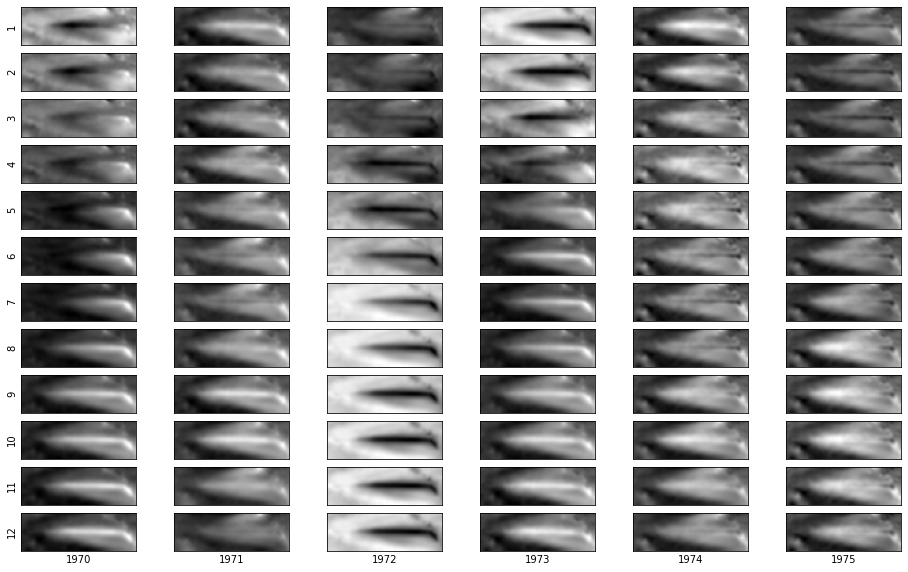

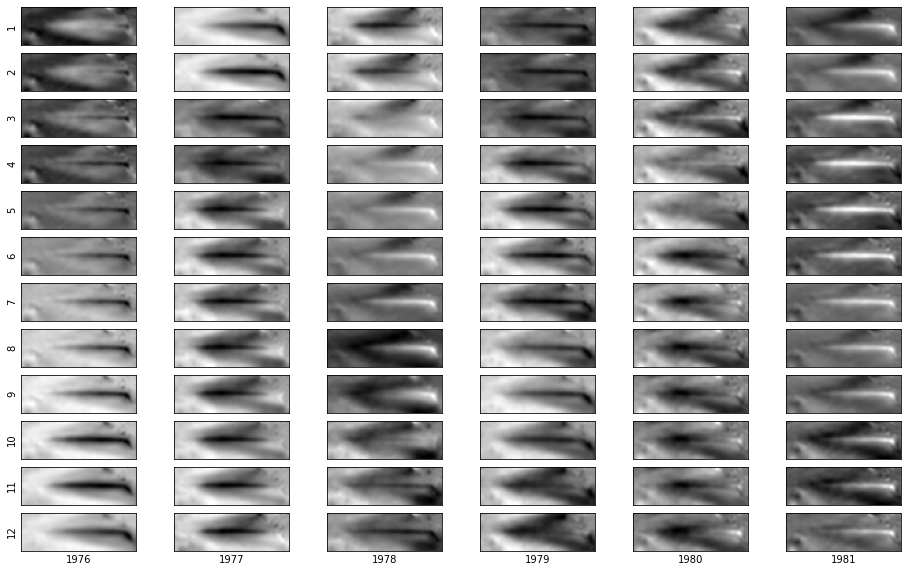

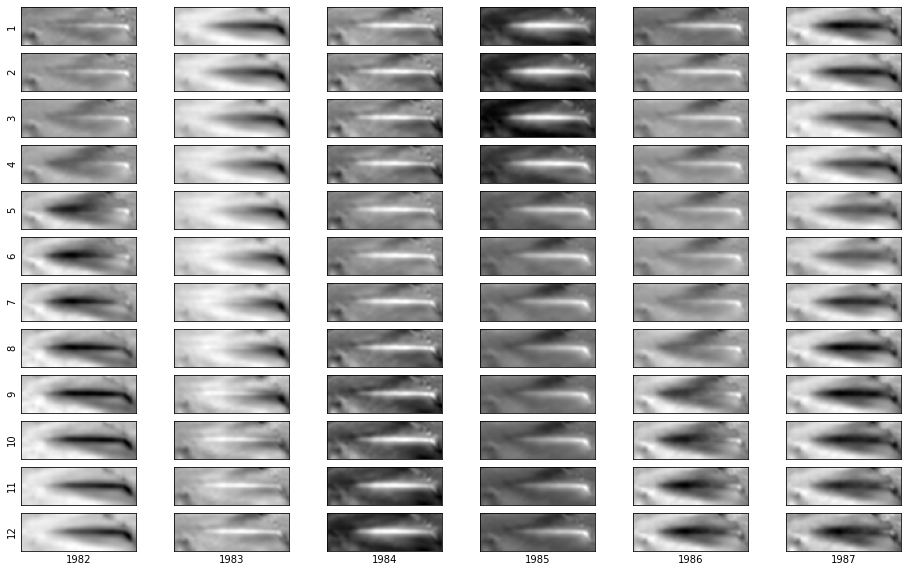

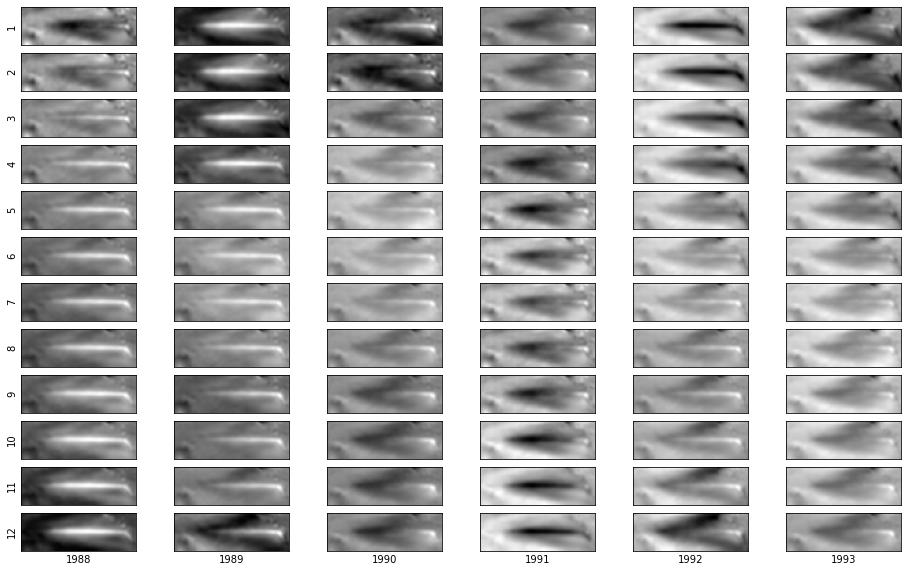

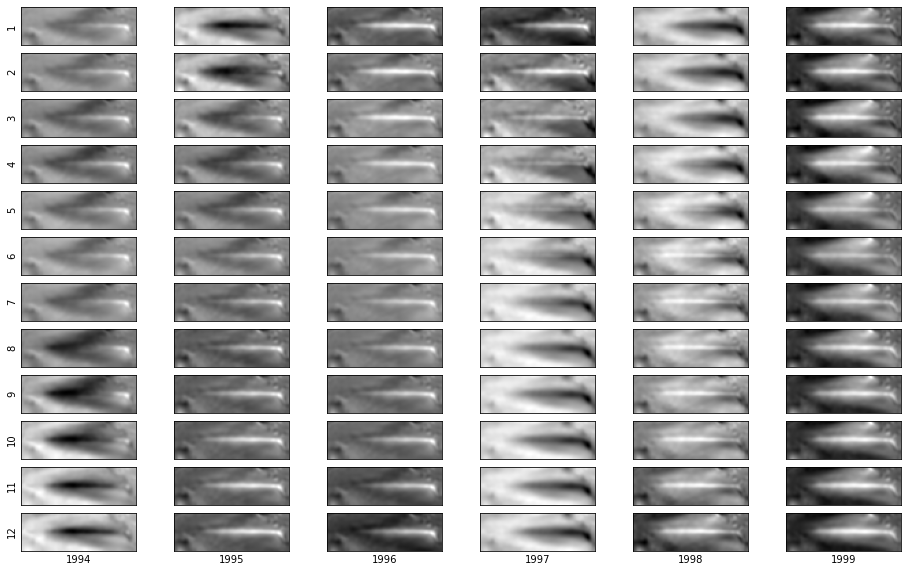

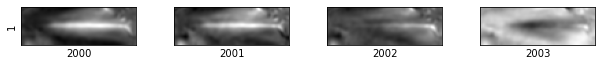

In [18]:
# eda08_12
# CAC Pacific Sea Surface Temperature (SST) dataset
# plot approximation to SST's using just lowest factors

# load the data
D = np.genfromtxt('cac_sst.txt', delimiter='\t')

# set up sizes of arrays
I, J = np.shape(D);
NBLOCK=85;
NLON = NBLOCK-1;
NLAT = J-1;
IMAGES = floor(I/NBLOCK);
Dt = 1/12;
print('Images:',IMAGES)

# arrays for SST, date, lats, lons
SST = np.zeros((NLON,NLAT,IMAGES));
thedate = np.zeros((IMAGES,1)); # in month.year format
theyear = np.zeros((IMAGES,1)); # year extracted from thedate
themonth = np.zeros((IMAGES,1)); # month extracted from thedate
lats=np.zeros((NLAT,1));
lons=np.zeros((NLON,1));

# cut up data into SST arrays
lats = np.copy(D[0,1:J]).T;
lons = np.copy(D[1:NBLOCK,0]);
for j in range(IMAGES):
    k1 = j*NBLOCK;
    k2 = k1+NLON;
    thedate[j,0]=D[k1,0];
    themonth[j,0]=floor(thedate[j,0]);
    theyear[j,0]=floor(10000*(thedate[j,0]-themonth[j,0])+0.1);
    SST[:,:,j] = np.copy(D[k1+1:k2+1,1:J]);
    
print("start year %d month %d" % (theyear[0,0], themonth[0,0]));
print("end   year %d month %d" % (theyear[IMAGES-1,0], themonth[IMAGES-1,0]));
    
# some definitions related to plotting
MONTHS=12;
YEARS=ceil(IMAGES/12);
YBLOCKSIZE = 6;
YBLOCKS = ceil(YEARS/YBLOCKSIZE);

# fold out into array
SSTV = np.zeros( (IMAGES, NLAT*NLON) );
for j in range(IMAGES):
    for p in range(NLAT):
        for q in range(NLON):
            k = p + q*NLAT;
            SSTV[j,k] = SST[q, p, j];

# singular value decomposition
[U, sigma, VT] = la.svd(SSTV,full_matrices=False);
sh = np.shape(sigma);
Ns = sh[0];

# keep only first few singular values
P=5;
FP = np.copy(VT[0:P,:]);
CP = np.matmul( U[:,0:P], np.diag(sigma[0:P]));

# reconstruct with a small number of EOFs
SSTVp = np.matmul(CP, FP);

# fold reconstruction into maps
Nf = IMAGES;
SSTp = np.zeros((NLON,NLAT,Nf));
for j in range(Nf):
    for p in range(NLAT):
        for q in range(NLON):
            k = p + q*NLAT;
            SSTp[ q, p, j ] = SSTVp[j,k];
# colormap
bw = np.zeros((256,4));
v = (255 - np.linspace( 0, 255, 256 ))/255;
bw[:,0] = v;
bw[:,1] = v;
bw[:,2] = v;
bw[:,3] = np.ones(256);
bwcmap = ListedColormap(bw);

# plor data, 12 months by six years of maps per figure
lastmonth = (IMAGES % YBLOCKSIZE*12) % YBLOCKSIZE ;
done=0;
for yb in range(YBLOCKS):
    fig = plt.figure(yb+2,figsize=(16,10));
    for m in range(MONTHS):
        for y in range(YBLOCKSIZE):
            j = m+MONTHS*y+MONTHS*YBLOCKSIZE*yb;
            k = y + m*YBLOCKSIZE;
            if( j>=IMAGES):
                done=1;
                break;
            ax = plt.subplot(MONTHS, YBLOCKSIZE, k+1);
            left=0;
            right=3.0;
            bottom=0.0;
            top=1.0;
            plt.axis( [left, right, bottom, top] );
            ax.xaxis.set_ticks([]);
            ax.yaxis.set_ticks([]);
            MAP=np.flipud(SSTp[:,:,j].T); # reorient so it plots as map
            MAPmin = np.min(MAP);
            MAPmax = np.max(MAP);
            MAPrange = MAPmax-MAPmin;
            if( MAPrange<=0.0 ):
                MAPrange=1;
            plt.imshow( (MAP-MAPmin)/MAPrange, cmap=bwcmap, vmin=0, vmax=1, extent=(left,right,bottom,top) );
            if( y==0 ):
                plt.ylabel("%d" % (themonth[j,0]) );
            if( (m==11) or ((yb==(YBLOCKS-1)) and (m==lastmonth))  ):
                plt.xlabel("%d" % (theyear[j,0]) );
        if( done==1 ):
            break;
    if( done==1 ):
            break;
    plt.show();
